# Imports

In [68]:
from PIL import Image, ImageOps, ImageDraw
from bresenham import bresenham
from skimage.color import rgb2gray
from skimage.draw import line
import numpy as np
import matplotlib.pyplot as plt
import sys

# Parameters

In [69]:
# Parameters 
INPUT_IMAGE_PATH = 'taco.png'
OUTPUT_IMAGE_PATH = 'taco_threaded.png'
OUTPUT_IMAGE_DIMENSIONS = (512, 512)
OUTPUT_IMAGE_RADIUS = OUTPUT_IMAGE_DIMENSIONS[0] / 2 - 0.5 # -0.5 to make it exactly on the center
OUTPUT_IMAGE_CENTER_POSITION = (OUTPUT_IMAGE_DIMENSIONS[0] / 2, OUTPUT_IMAGE_DIMENSIONS[1] / 2)
NAILS_AMOUNT = 12
SKIP_NEIGHBOUR_NAILS = 1

print("Parameters:")
print("INPUT_IMAGE_PATH: " + INPUT_IMAGE_PATH)
print("OUTPUT_IMAGE_PATH: " + OUTPUT_IMAGE_PATH)
print("OUTPUT_IMAGE_DIMENSIONS: " + str(OUTPUT_IMAGE_DIMENSIONS))
print("OUTPUT_IMAGE_RADIUS: " + str(OUTPUT_IMAGE_RADIUS))
print("OUTPUT_IMAGE_CENTER_POSITION: " + str(OUTPUT_IMAGE_CENTER_POSITION))
print("NAILS_AMOUNT: " + str(NAILS_AMOUNT))
print("SKIP_NEIGHBOUR_NAILS: " + str(SKIP_NEIGHBOUR_NAILS))

Parameters:
INPUT_IMAGE_PATH: taco.png
OUTPUT_IMAGE_PATH: taco_threaded.png
OUTPUT_IMAGE_DIMENSIONS: (512, 512)
OUTPUT_IMAGE_RADIUS: 255.5
OUTPUT_IMAGE_CENTER_POSITION: (256.0, 256.0)
NAILS_AMOUNT: 12
SKIP_NEIGHBOUR_NAILS: 1


# Empty image preparation

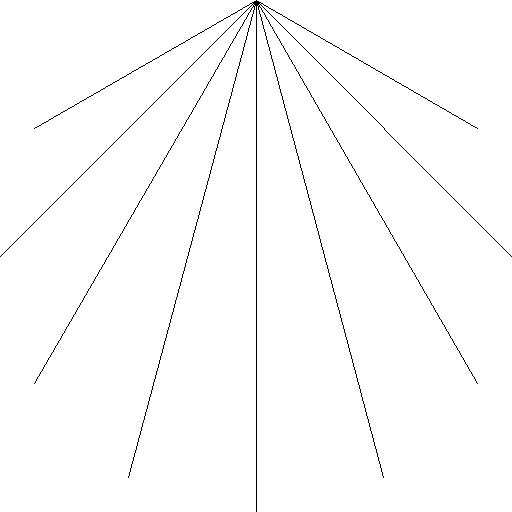

In [70]:
# Get an empty image with the given dimensions 
def generate_new_image(dimensions):
    return Image.new('L', dimensions, (255))
    
# Generate points on a circle with a given radius and center
def generate_nail_positions(radius, center, amount):
    nails = []
    for i in range(0, amount):
        angle = (2 * np.pi * i / amount) - np.pi / 2 # -pi/2 to make it start at the top
        x = radius * np.cos(angle) + center[0]
        y = radius * np.sin(angle) + center[1]
        nails.append((x, y))
    return nails

# Generate a list of lines between two points
def generate_thread_positions(nails):
    threads = []
    for i in range(0, len(nails)):
        for j in range(i + 1 + SKIP_NEIGHBOUR_NAILS, len(nails)):
            if i == 0 and j >= len(nails) - SKIP_NEIGHBOUR_NAILS: continue # Skip the last nails in first iteration
            threads.append((nails[i], nails[j]))
    return threads

# Display a list of lines on a given image
def display_threads(lines, image):
    for line in lines:
        x1 = int(line[0][0])
        y1 = int(line[0][1])
        x2 = int(line[1][0])
        y2 = int(line[1][1])
        draw = ImageDraw.Draw(image)
        draw.line((x1, y1, x2, y2), fill=0, width=1)
    return image

# Display a list of points on a given image
def display_points(points, image):
    for point in points:
        image.putpixel((int(point[0]), int(point[1])), (0))
    return image

# Get all threads from a given nail
def get_threads_from_nail(threads, nail):
    threads_from_nail = []
    for thread in threads:
        if nail in thread:
            threads_from_nail.append(thread)
    return threads_from_nail

def get_other_end_of_thread(thread, nail):
    if nail == thread[0]:
        return thread[1]
    else:
        return thread[0]

# output_image = generate_new_image(OUTPUT_IMAGE_DIMENSIONS)
# n = generate_nail_positions(OUTPUT_IMAGE_RADIUS, OUTPUT_IMAGE_CENTER_POSITION, NAILS_AMOUNT)
# #display(display_points(n, output_image))
# t = generate_thread_positions(n)


# g = get_threads_from_nail(t, n[0])

# display_threads(g, output_image)






#display_lines(e, output_image)#.save('nails.png')

# Prepare input image

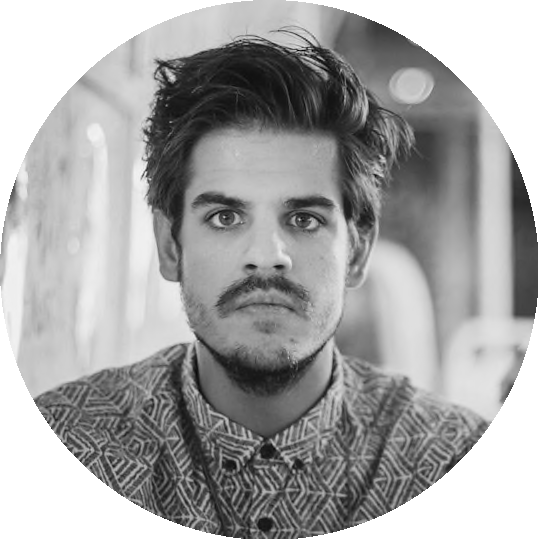

In [71]:
# Get image from files 
def get_image(filename):
    return Image.open(filename)

# Crop image to a square
def crop_image_to_square(image):
    width, height = image.size
    if width > height:
        left = (width - height) / 2
        right = left + height
        top = 0
        bottom = height
    else:
        left = 0
        right = width
        top = (height - width) / 2
        bottom = top + width
    return image.crop((left, top, right, bottom))

# Crop image to a circle
def crop_image_to_circle(image):
    np_image = np.array(image)
    alpha = Image.new('L', img.size, 0)
    draw = ImageDraw.Draw(alpha)
    draw.pieslice([0, 0, image.size[0], image.size[1]], 0, 360, fill=255)
    np_alpha = np.array(alpha)
    np_image = np.dstack((np_image, np_alpha))
    return Image.fromarray(np_image)

# Convert image to grayscale
def convert_image_to_grayscale(image):
    return image.convert('L')

def get_prepared_input_image():
    image = get_image(INPUT_IMAGE_PATH)
    image = crop_image_to_square(image)
    image = crop_image_to_circle(image)
    image = convert_image_to_grayscale(image)
    return image

# img = get_image(INPUT_IMAGE_PATH)
# img = crop_image_to_square(img)
# img = convert_image_to_grayscale(img)
# img = crop_image_to_circle(img)
# display(img)





# Own algorithm

In [72]:

# Start at random nail 
# Get all unused threds from that nail
# Put through fitness function
# Select best thread
# Add to used threads
# Go to next nail
# Repeat until fitness function returns positive values
# If no positive values, undo last nail and choose second best thread (parametrize how many step to go back)
# Repeat until no improvement can be made

# Save image

input_image = get_prepared_input_image()
output_image = generate_new_image(OUTPUT_IMAGE_DIMENSIONS)
nails = generate_nail_positions(OUTPUT_IMAGE_RADIUS, OUTPUT_IMAGE_CENTER_POSITION, NAILS_AMOUNT)
threads = generate_thread_positions(nails)



used_threads = []

for i in range(0, 100):
    
g = get_threads_from_nail(t, n[0])
